In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve
from scipy.signal import lfilter, butter
from scipy import signal
import scipy
import math

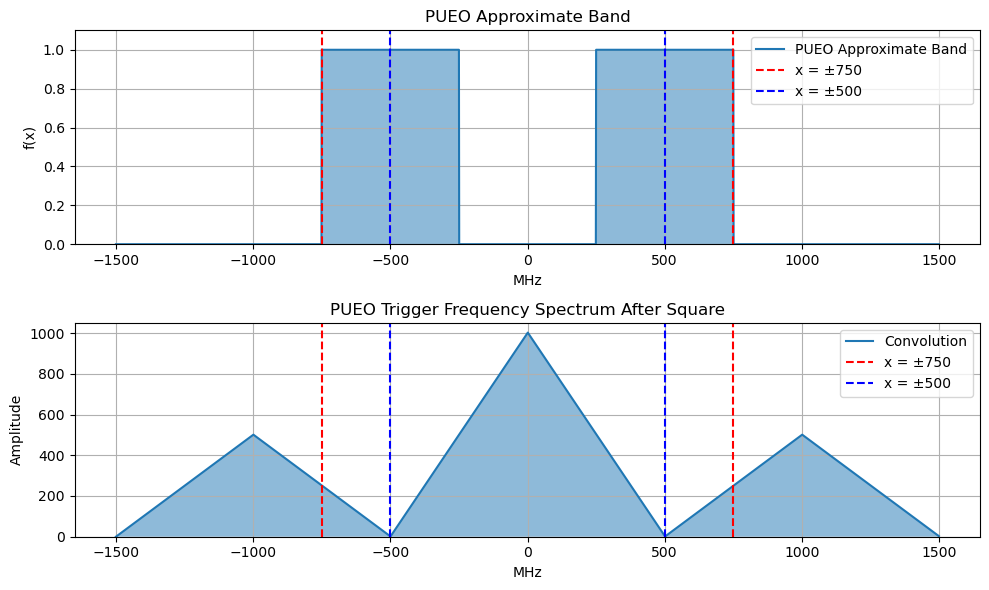

In [17]:
# Shamefully generated from ChatGPT in bed on my phone

# Define x-axis range
x = np.arange(-1500, 1500)

# Define the function: 1 in [250,750] and [-750,-250], 0 elsewhere
f_new = np.zeros_like(x, dtype=float)
f_new[(x >= 250) & (x <= 750)] = 1
f_new[(x >= -750) & (x <= -250)] = 1

# Convolve the function with itself
convolved_new = convolve(f_new, f_new, mode='same')

# Normalize x-axis for convolution result
x_conv_new = np.linspace(x[0], x[-1], len(convolved_new))

# Plot the original function and its convolution
plt.figure(figsize=(10, 6))

# Plot the original function
plt.subplot(2, 1, 1)
plt.plot(x, f_new, label='PUEO Approximate Band')
plt.axvline(x=750, color='r', linestyle='--', label='x = ±750')
plt.axvline(x=-750, color='r', linestyle='--')
plt.axvline(x=500, color='b', linestyle='--', label='x = ±500')
plt.axvline(x=-500, color='b', linestyle='--')
plt.fill_between(x, 0, f_new, where=f_new>0, interpolate=True, alpha=0.5)
plt.title('PUEO Approximate Band')
plt.xlabel('MHz')
plt.ylabel('f(x)')
plt.grid(True)
plt.ylim(0,1.1)
plt.legend()

# Plot the convolution result
plt.subplot(2, 1, 2)
plt.plot(x_conv_new, convolved_new, label='Convolution')
plt.fill_between(x_conv_new, 0, convolved_new, where=convolved_new>0, interpolate=True, alpha=0.5)
plt.axvline(x=750, color='r', linestyle='--', label='x = ±750')
plt.axvline(x=-750, color='r', linestyle='--')
plt.axvline(x=500, color='b', linestyle='--', label='x = ±500')
plt.axvline(x=-500, color='b', linestyle='--')
plt.title('PUEO Trigger Frequency Spectrum After Square')
plt.xlabel('MHz')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(0,1050)
plt.legend()

plt.tight_layout()
plt.show()